In [26]:
import pyart
import matplotlib.pyplot as plt
import os,glob
import numpy as np
import metpy.plots.ctables as ctables
import products
import sort_radar
from pyhail import mesh_ppi
from datetime import datetime, timedelta
from time import process_time

In [5]:
# read the radar file
radar = pyart.aux_io.read_gamic('217BRS-20221030173104.HDF5')

In [6]:
# sort and perform the interpolation
radar = sort_radar.main(radar)

In [28]:
# evaluate the VIL, ET and VILD

start_time = process_time()

radar = products.calc_VIL(radar, 'corrected_reflectivity')
radar = products.calc_ET(radar, 'corrected_reflectivity')
radar = products.calc_VILD(radar, 'VIL', 'ET')

print("--- %s seconds ---" % (process_time() - start_time))

--- 23.079302900000002 seconds ---


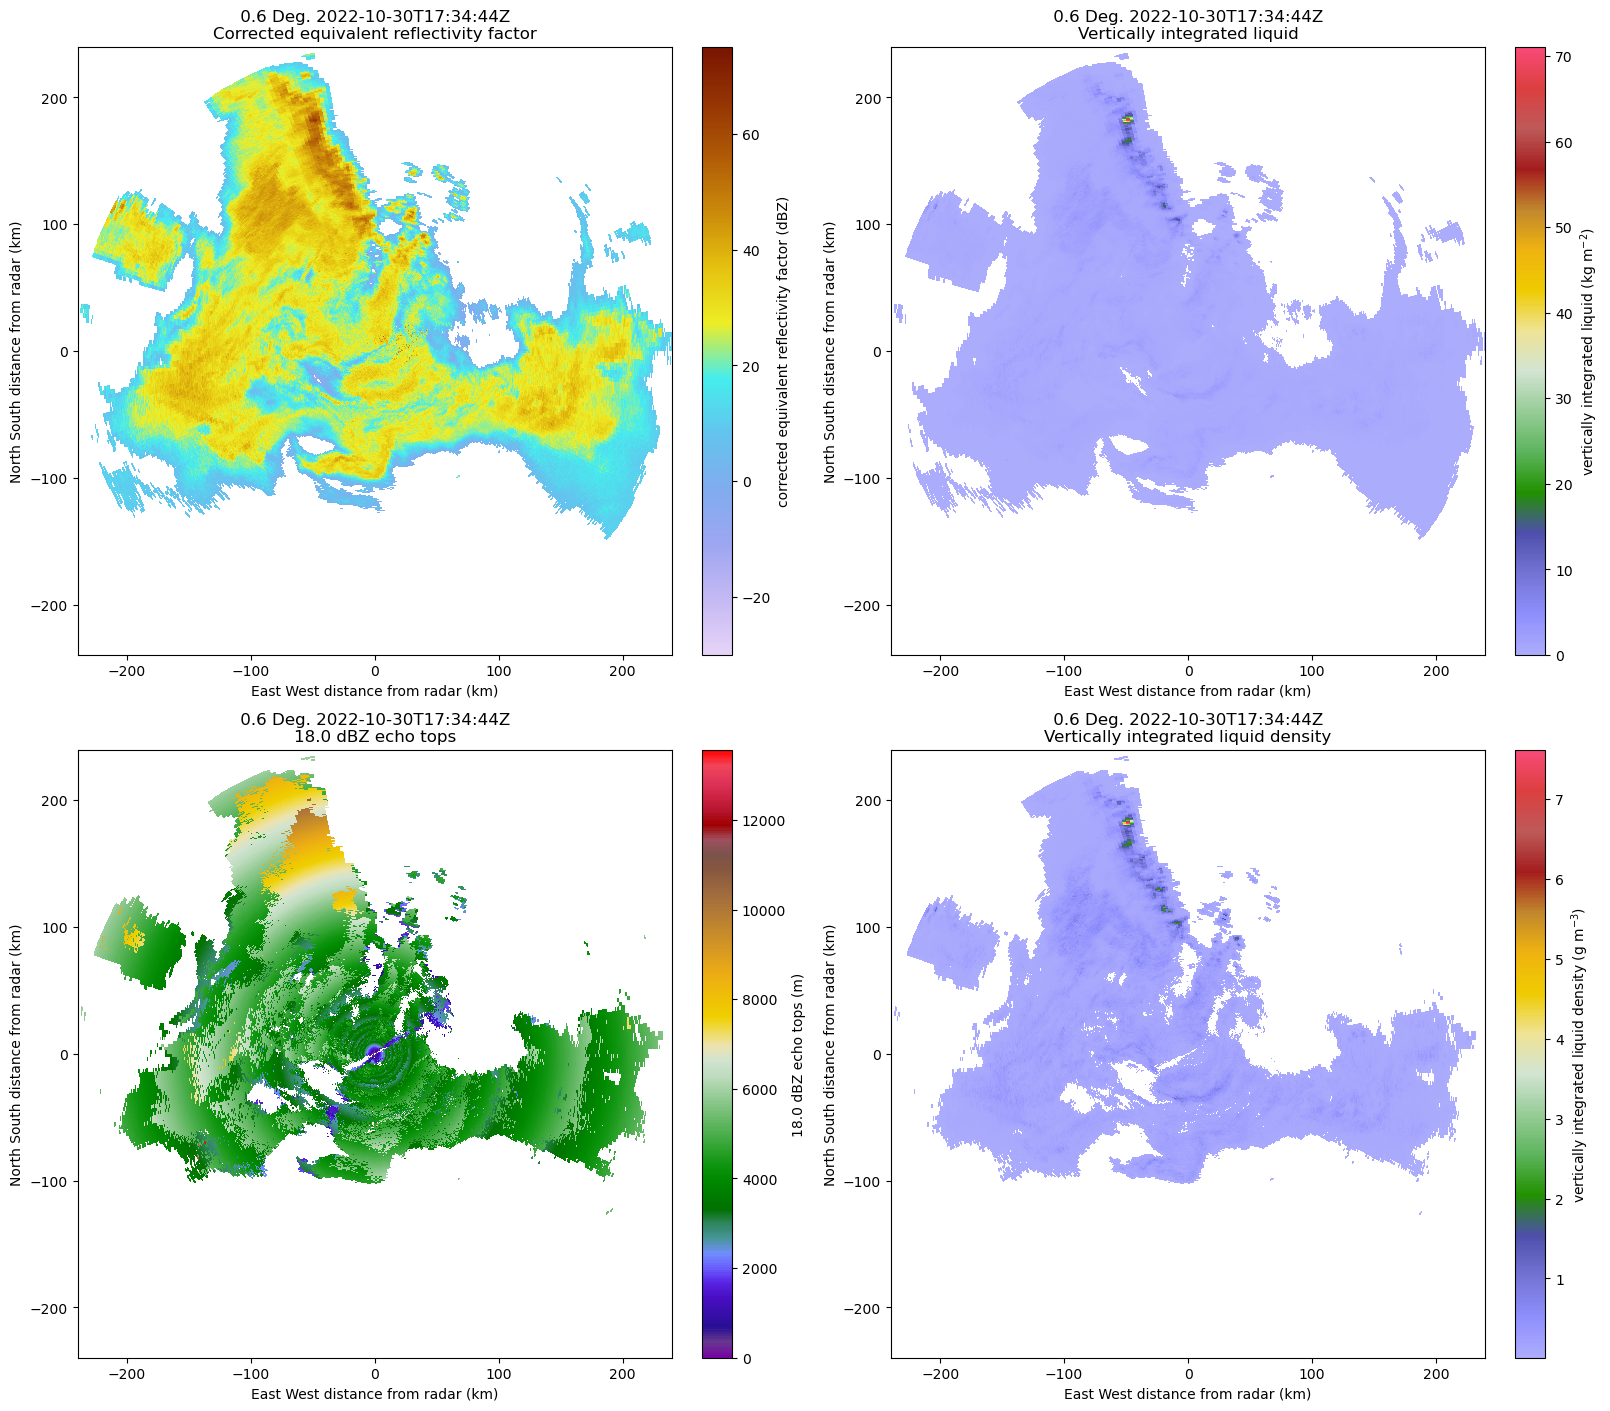

In [36]:
display = pyart.graph.RadarDisplay(radar)

#gatefilter.exclude_below('corrected_reflectivity', 0)
fig, axs = plt.subplots(2, 2, figsize = [16, 14], constrained_layout = True)
display.plot_ppi('corrected_reflectivity', 0, cmap = pyart.graph.cm.LangRainbow12, ax = axs.ravel()[0])
display.plot_ppi('VIL', 0, ax = axs.ravel()[1], cmap = pyart.graph.cm.Theodore16)
display.plot_ppi('ET', 0, ax = axs.ravel()[2], cmap = pyart.graph.cm.Carbone42)
display.plot_ppi('VILD', 0, ax = axs.ravel()[3], cmap = pyart.graph.cm.Theodore16)

plt.savefig('/mnt/c/Users/User/Desktop/aa.jpg', dpi = 300, bbox_inches = 'tight')